<a href="https://colab.research.google.com/github/taimur1871/label_propogation_experiments/blob/main/Rana_4_1_Label_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Label Propagation

## Label propagation is similar to training a classification model and then using that model to make predictions on test data. The key difference is that in general, our analogue to the test data has no labels against which to evaluate our model. In this exercise, we keep the entire set of true labels for illustrative purposes, but the vast marjority of them play no role in training the model. 

## This exercise is adapted from scikit-learn's [tutorial](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html) on zero shot learning .

### Load the necessary modules and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

### Exercise: Load and preprocess the data. 
1. Shuffle the indices
2. Use the shuffled indices to extract 1000 random samples from the features data
3. Extract the corresponding 1000 labels and images
4. Copy the labels. Treat the first 50 shuffled samples as labeled data and the rest as unlabeled data. Replace the labels after the first 50 with -1.

We'll use this copy of our labels (with 50 labels known and the other 950 hidden) to train our model, and use the original copy (with all 1000 labels known) to evaluate the model.

In [2]:
# Load the digits dataset
# digits = {data,target,indices}; n = 1797
digits = datasets.load_digits()

# Set the random state to 2 for reproducibility
rng = np.random.RandomState(2)

### START CODE HERE ###
# Initialize the indices as an ordered array, with each element corresponding to a sample in the dataset
indices = np.arange(len(digits.data))

# Shuffle the indices
rng.shuffle(indices)

# Use the shuffled indices to extract 1000 feature vectors, labels, and images
n_total_samples = len(digits.target[indices[:1000]])
# Features
X = digits.data[indices[:1000]]
# Labels
y = digits.target[indices[:1000]]
# Images
images = digits.images[indices[:1000]]

# Copy the labels
y_train = np.copy(y)

# Replace all of the elements of y_train after the first 50 with -1, rendering them unlabeled
n_labeled_points = 50
# Create an ordered array of indices of the training data
train_indices = np.arange(len(y_train))
# Define the training data indices after n_labeled_points as unlabeled
unlabeled_set = train_indices[n_labeled_points:]
# Conduct the label replacement
y_train[unlabeled_set] = -1
### END CODE HERE ###

### Verify that the labels are randomly distributed and all the labels after the first 50 in `y_train` are hidden

In [3]:
print(y_train[0:100])

[ 4  0  9  1  4  7  1  5  1  6  6  7  6  1  5  5  4  6  2  7  4  6  4  1
  5  2  9  5  4  6  5  6  3  4  0  9  9  8  4  6  8  8  5  7  9  6  9  6
  1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


### Exercise: Train the label propagation model with `gamma = 0.25` and `max_iter = 20`

### Make sure you pass in the correct version of the target array, i.e. the one containing unlabeled data

In [4]:
### START CODE HERE ###
# Initialize the model
lp_model = LabelSpreading(gamma=.25, max_iter=20)
# Train the model
lp_model.fit(X, y_train)
### END CODE HERE ###

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

### Exercise: Evaluate the model's performance on the unlabeled data

In [5]:
### START CODE HERE ###
# Extract the label predictions for the unlabeled data
predicted_labels = lp_model.transduction_[unlabeled_set]
# Extract the true labels of the unlabeled data
true_labels = y[unlabeled_set]
# Compute the confusion matrix between the true and predicted labels of the unlabeled data
cm = confusion_matrix(true_labels, predicted_labels)
### END CODE HERE ###
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Label Spreading model: 50 labeled & 950 unlabeled points (1000 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.85      0.90      0.88        93
           2       0.99      0.78      0.87        91
           3       0.92      0.90      0.91       108
           4       0.97      1.00      0.98        88
           5       0.97      0.93      0.95       102
           6       0.97      1.00      0.99       100
           7       0.98      0.91      0.94        91
           8       0.86      0.82      0.84        87
           9       0.77      0.97      0.86        92

    accuracy                           0.92       950
   macro avg       0.93      0.92      0.92       950
weighted avg       0.93      0.92      0.92       950

Confusion matrix
[[ 98   0   0   0   0   0   0   0   0   0]
 [  0  84   0   0   1   1   0   0   3   4]
 [  0  12  71   0   0   0   0   1   7   0]
 [  0   0   0  97   0   0

### Exercise: Find the 10 most uncertain labels in descending order of uncertainty, i.e. the labels for which the model made the least confident predictions. Plot the associated images. Observe any discrepancies between predicted and true labels. Do you see any patterns? What might account for them? 

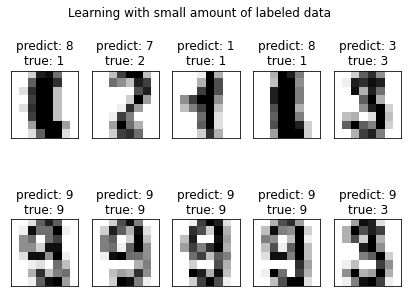

In [6]:
### START CODE HERE ###
# Calculate uncertainty values for each transduced distribution
# You may use scipy stats' entropy() function useful.
pred_entropies = stats.entropy(lp_model.label_distributions_.T)

# Pick the top 10 most uncertain labels, in descending order of uncertainty
uncertainty_index = np.argsort(pred_entropies)[-10:]

### END CODE HERE ###

# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data')
plt.show()

### Exercise: Repeat the experiment with 10, 100, and 250 labeled images. How do the differing numbers of labeled samples affect the model's performance? Which number detections yield the most errors?



## Sample Tests for Sizes 10, 100, 250 & 500

In [7]:
# function to extract features, labels and images for various number of images
def get_data(digits, num_images):
  # Use the shuffled indices to extracting 10 feature vectors, labels, and images
  n_total_samples = len(digits.target[indices[:num_images]])
  X = digits.data[indices[:num_images]] # features
  y = digits.target[indices[:num_images]] # Labels
  images = digits.images[indices[:num_images]] # Images
  y_train = np.copy(y)

  # Replace all of the elements of y_train after the first 50 with -1, rendering them unlabeled
  n_labeled_points = num_images//5
  # Create an ordered array of indices of the training data
  train_indices = np.arange(len(y_train))
  # Define the training data indices after n_labeled_points as unlabeled
  unlabeled_set = train_indices[n_labeled_points:]
  # Conduct the label replacement
  y_train[unlabeled_set] = -1

  return X, y_train, unlabeled_set, y, images

In [8]:
# function to instaniate model and create confusion matrix
def model_lp(X, y_train, unlabeled_set, y, images):
  lp_model = LabelSpreading(gamma=.25, max_iter=20)
  lp_model.fit(X, y_train)

  predicted_labels = lp_model.transduction_[unlabeled_set]
  # Extract the true labels of the unlabeled data
  true_labels = y[unlabeled_set]
  # Compute the confusion matrix between the true and predicted labels of the unlabeled data
  cm = confusion_matrix(true_labels, predicted_labels)
  print(classification_report(true_labels, predicted_labels))
  print("Confusion matrix")
  print(cm)

  pred_entropies = stats.entropy(lp_model.label_distributions_.T)
  uncertainty_index = np.argsort(pred_entropies)[-10:]

  f = plt.figure(figsize=(7, 5))
  for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

  f.suptitle('Learning with small amount of labeled data')
  plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0

Confusion matrix
[[0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


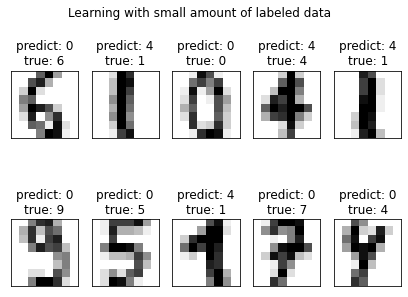

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.55      0.75      0.63         8
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00        11
           4       0.32      0.67      0.43         9
           5       0.90      1.00      0.95         9
           6       1.00      0.89      0.94         9
           7       0.50      0.86      0.63         7
           8       0.00      0.00      0.00        12
           9       0.33      0.57      0.42         7

    accuracy                           0.56        80
   macro avg       0.51      0.62      0.55        80
weighted avg       0.45      0.56      0.49        80

Confusion matrix
[[4 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 2 0 0 0 0 0]
 [0 2 2 0 0 0 0 0 0 0]
 [0 1 2 0 0 0 0 3 0 5]
 [0 0 0 0 6 0 0 3 0 0]
 [0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 1 0 8 0 0 0]
 [0 0 0 0 1 0 0 6 0 0]
 [0 0 0 0 9 0 0 0 0 3]
 [0 2 0 0 0 1 0 0

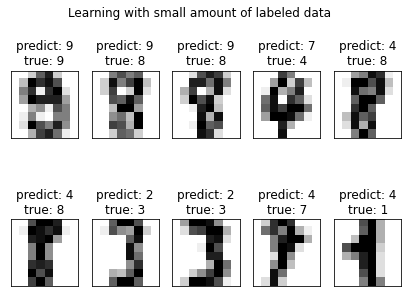

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.74      0.85        23
           2       1.00      0.81      0.89        21
           3       0.93      0.93      0.93        28
           4       1.00      0.87      0.93        15
           5       1.00      1.00      1.00        21
           6       0.88      1.00      0.93        14
           7       0.96      0.92      0.94        24
           8       0.67      0.86      0.75        21
           9       0.71      0.94      0.81        16

    accuracy                           0.90       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.90      0.90       200

Confusion matrix
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  6  0]
 [ 0  0 17  0  0  0  1  0  3  0]
 [ 0  0  0 26  0  0  0  1  0  1]
 [ 0  0  0  0 13  0  0  0  0  2]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0 14  0 

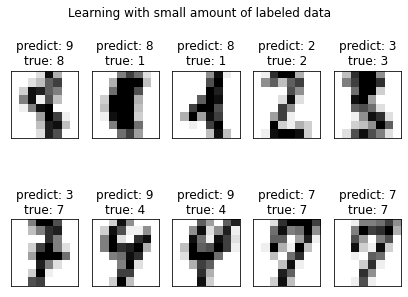

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.98      0.99        41
           2       0.97      0.86      0.92        44
           3       0.79      0.94      0.86        49
           4       0.97      1.00      0.99        34
           5       0.95      0.95      0.95        43
           6       0.97      1.00      0.99        39
           7       1.00      0.86      0.92        42
           8       0.80      0.88      0.84        32
           9       0.81      0.76      0.79        34

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400

Confusion matrix
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  1]
 [ 0  0 38  4  0  0  0  0  2  0]
 [ 0  0  0 46  0  0  0  0  2  1]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  0  0  0  0  0 39  0 

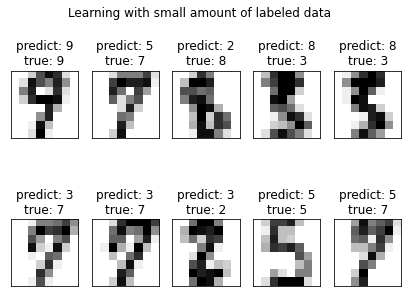

In [9]:
# Load the digits dataset
digits = datasets.load_digits()
rng = np.random.RandomState(2)
# Initialize the indices as an ordered array
indices = np.arange(len(digits.data))
rng.shuffle(indices) # Shuffle the indices

num_pics = [10, 100, 250, 500]

for npic in num_pics:
  X_tr, y_tr, unlabel_set, y, imgs = get_data(digits, npic)

  model_lp(X_tr, y_tr, unlabel_set, y, imgs)

### Results

For these tests the unlabeled set was 20% of the total samples. It is quite high especially for smaller size datasets but it did reveal some interesting results. The link below shows scores for precision and recall for various sample sizes.

Obviously the smaller samples had very low accuracy.
* 10 samples 0 F1 score (the model is just guessing)
* 100 samples 0.56 F1 score (still guessing but accurate at least half the time)
* 250 samples 0.90 F1 score (much imporved model)
* 500 samples 0.93 F1 score (performance plateauing)

Based on the above observations it can be seen that performance increases rapidly as number of training samples are increased upto a point. Also to get fairly good performance the number of samples do not need to be very high as long as the starting categories are well defined.

In case of 10 and 100 samples the starting categories did not have any representative samples or very low numbers in certain categories so the model had no way to learn and propogate those samples.

This can be seen in the predictions, the first model predits either 0 or 4 presumably because it did not have any 0 samples so it assumes any category that it is unable to identify must belong to 0, and 4 becasue it seems like the most readily identifiable or applicable label (can be applied to 1, 7 for example.

At 100 samples some categories have more samples than others. Intresting observation in this case is that the model does not accurately predict any of the labels in the categories that are over represented. For example 8 has most samples but it constantly mislabels it as 9 or 4.

At 250 samples the predcitions start getting better. However, 8, 9 and 4 still seem to cause problems.

At 500 samples the performance improves marginally in terms of F1 score but perfromance in identifying 9 improves. 8 still proves challenging.

Overall the number that seems to prove most challenging is 8, it is possible to confuse it with 3, 8, 9 or even 1 depending on the resoltion and handwriting style.